# Homework - 2
***
**Name**: Bhalchandra Naik
***

This assignment is due on Canvas by **5pm on Friday October 5th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

## Boosting - Extra Credit [5-points]
***

In this problem, we slightly modify the AdaBoost algorithm to better explore some properties of the algorithm. Specifically, we no longer normalize the weights on the training examples after each iteration. The modified algorithm, which is set to run for $T$ iterations, is shown in Algorithm I.

Note that in the modified version, the weights associated with the training examples are no longer guaranteed to sum to one after each iteration (and therefore can not be viewed as a "distribution"), but the algorithm is still valid. Let us denote the sum of weights at the start of iteration $t$ by $Z_t = \sum_{i=1}^{n}w_i^{(t)}$. At the start of the first iteration of boosting, $Z_1 = n$. Let us now investigate the behavior of $Z_t$, as a function of t

![image](fig-1.png)

**A:** At the $t^{th}$ iteration, we found a weak classifier that achieves a weighted training error $\epsilon_t$. Show that the choice, $\alpha_t = \frac{1}{2}\log\frac{1 - \epsilon_t}{\epsilon_t}$ is the optimal in the sense that it minimizes $Z_{t+1}$

*Hint: Look at $Z_{t+1}$ as function of $\alpha$ and find the value of $\alpha$ for which the function achieves the minimum. You may also find the following notational shorthand useful:

$$W_t = \sum_{i=1}^{n}w_i^{(t)}(1 - \delta(y_i, h_t(x_i)))$$
$$W_c = \sum_{i=1}^{n}w_i^{(t)}(\delta(y_i, h_t(x_i)))$$

where $W_c$ is the total weight of the points classified correctly by $h_t$ and $W_t$ is the total weight of the misclassified points. $\delta(y, h_t(x)) = 1$ whenever the label predicted by $h_t$ is correct and zero otherwise. The weights here are those available at the start of iteration $t$

__Solution__:

> Let us first express the quantity $Z_{t+1}$ in terms of $\alpha_t$. We know that:
$$Z^{t+1} = \sum_{i=1}^{n}w_i^{(t+1)}$$
> Now we know that $w_i^{t+1} = w_i^{(t)}e^{-y_ih_t(x_i)\alpha_t}$. On substituting this value in the above equation we get:
$$Z^{t+1} = \sum_{i=1}^{n}w_i^{(t)}e^{-y_ih_t(x_i)\alpha_t}$$
> Now we need to split this summation in terms of $\delta(y_i, h_t(x_i))$ for classified points and $(1-\delta(y_i, h_t(x_i)))$
for misclassified points. Therefore we get : 
$$Z^{t+1} = \sum_{i=1}^{n}w_i^{(t)}e^{-y_ih_t(x_i)\alpha_t}(1-\delta(y_i, h_t(x_i))) + \sum_{i=1}^{n}w_i^{(t)}e^{-y_ih_t(x_i)\alpha_t}\delta(y_i, h_t(x_i))$$
> Now for misclassified points the $y_ih_t(x_i) = -1$ and for correctly classified points it becomes $y_ih_t(x_i) = 1$. Thus substituting these values above we get:
$$Z^{t+1} = \sum_{i=1}^{n}w_i^{(t)}e^{\alpha_t}(1-\delta(y_i, h_t(x_i))) + \sum_{i=1}^{n}w_i^{(t)}e^{-\alpha_t}\delta(y_i, h_t(x_i))$$
> Now, $\epsilon_t = \frac{1}{Z_t}\sum_{i=1}^{n}w_i^{(t)}(1-\delta(y_i, h_t(x_i)))$ and $(1-\epsilon_t) = \frac{1}{Z_t}\sum_{i=1}^{n}w_i^{(t)}\delta(y_i, h_t(x_i))$.  Thus on substituting in the relation above we get:
$$Z^{t+1} = e^{\alpha_t}\epsilon_tZ_t + e^{-\alpha_t}(1-\epsilon_t)Z_t$$
> Now, we expressed $Z_{t+1}$ as a function of $\alpha_t$ diffrentiating on both sides with $\alpha_t$ we get,
$$\frac{\delta Z^{t+1}}{\delta\alpha_t} = \alpha_te^{\alpha_t}\epsilon_tZ_t -\alpha_t e^{-\alpha_t}(1-\epsilon_t)Z_t$$
> For the value of $\alpha_t$ that minimizes the value of $Z_{t+1}$, the value of the above diffrential $\frac{\delta Z^{t+1}}{\delta\alpha_t}$ shall be $0$,
$$\alpha_te^{\alpha_t}\epsilon_tZ_t -\alpha_t e^{-\alpha_t}(1-\epsilon_t)Z_t = 0$$
> Eliminating common terms like $Z_t$ and $\alpha_t$ from coefficients we get,
$$e^{\alpha_t}\epsilon_t -e^{-\alpha_t}(1-\epsilon_t) = 0$$
$$e^{\alpha_t}\epsilon_t  = e^{-\alpha_t}(1-\epsilon_t)$$
$$e^{2\alpha_t} = \frac{1-\epsilon_t}{\epsilon_t}$$
> Taking $log_e$ on both sides we get:
$$2\alpha_t = log(\frac{1-\epsilon_t}{\epsilon_t})$$
$$\boxed{\alpha_t = \frac{1}{2}log(\frac{1-\epsilon_t}{\epsilon_t})}$$
Thus proved that the optimal value that minimizes $Z_{t+1}$ is $\alpha_t = \frac{1}{2}log(\frac{1-\epsilon_t}{\epsilon_t})$

**B:** Show that the sum of weights $Z_t$ is monotonically decreasing as a function of $t$.

__Solution:__
> Let us first describe the the quantity $Z_{t+1}$ in terms of the value $\epsilon_t$. We Know that $w_i^{(t+1)} = w_i^{(t)}e^{-y_ih_t(x_i)\alpha_t}$. Thus,
$$Z^{t+1} = \sum_{i=1}^{n}w_i^{(t+1)} = \sum_{i=1}^{n}w_i^{(t)}e^{-y_ih_t(x_i)\alpha_t}$$
> Now we need to split this summation in terms of $\delta(y_i, h_t(x_i))$ for classified points and $(1-\delta(y_i, h_t(x_i)))$
for misclassified points. Therefore we get : 
$$Z^{t+1} = \sum_{i=1}^{n}w_i^{(t)}e^{-y_ih_t(x_i)\alpha_t}(1-\delta(y_i, h_t(x_i))) + \sum_{i=1}^{n}w_i^{(t)}e^{-y_ih_t(x_i)\alpha_t}\delta(y_i, h_t(x_i))$$
> Now for misclassified points the $y_ih_t(x_i) = -1$ and for correctly classified points it becomes $y_ih_t(x_i) = 1$. Thus substituting these values above we get:
$$Z^{t+1} = \sum_{i=1}^{n}w_i^{(t)}e^{\alpha_t}(1-\delta(y_i, h_t(x_i))) + \sum_{i=1}^{n}w_i^{(t)}e^{-\alpha_t}\delta(y_i, h_t(x_i))$$
>Lets simplifying the above expression. Put $W_t = \sum_{i=1}^{n}w_i^{(t)}(1 - \delta(y_i, h_t(x_i)))$ and $W_c = \sum_{i=1}^{n}w_i^{(t)}(\delta(y_i, h_t(x_i)))$, we get,
$$Z^{t+1} = e^{\alpha_t}W_t^t + e^{-\alpha_t}W_c^t$$
> We know that $Z^{t} = W_t^t+W_c^t$, on subtracting the above expression with this one we get,
$$Z^{t+1} -  Z^{t}= e^{\alpha_t}W_t^t + e^{-\alpha_t}W_c^t - W_t^t - W_c^t$$
$$Z^{t+1} -  Z^{t}= (e^{\alpha_t} - 1)W_t^t + (e^{-\alpha_t}-1)W_c^t$$
$$\frac{Z^{t+1}}{Z^{t}} - 1 = (e^{\alpha_t} - 1)\frac{W_t^t}{Z^{t}} + (e^{-\alpha_t}-1)\frac{W_c^t}{Z^{t}}$$
> Now, the subsitute the value of $\alpha_t = \frac{1}{2}log\frac{1-\epsilon_t}{\epsilon_t}$ and simplify the quantities of $\frac{W_t^t}{Z^{t}} = \epsilon_t$ and $\frac{W_c^t}{Z^{t}} = 1-\epsilon_t$:
$$\frac{Z^{t+1}}{Z^{t}} - 1 = (e^{\frac{1}{2}log\frac{1-\epsilon_t}{\epsilon_t}} - 1)\epsilon_t + (e^{-\frac{1}{2}log\frac{1-\epsilon_t}{\epsilon_t}}-1)(1-\epsilon_t)$$
> On simplification we get :
$$\frac{Z^{t+1}}{Z^{t}} - 1 = \epsilon_t^{\frac{1}{2}}(1-\epsilon_t)^{\frac{1}{2}} - \epsilon_t + \epsilon_t^{\frac{1}{2}}(1-\epsilon_t)^{\frac{1}{2}} -1+ \epsilon_t$$
$$\frac{Z^{t+1}}{Z^{t}} = 2\sqrt{\epsilon_t(1-\epsilon_t)}$$
$$Z^{t+1} = 2\sqrt{\epsilon_t(1-\epsilon_t)}Z^{t}$$
> Now put $f(\epsilon_t) = 2\sqrt{\epsilon_t(1-\epsilon_t)}$ then,
$$Z^{t+1} = f(\epsilon_t)Z^{t}$$
> Now let us analyse the function $f(\epsilon_t)$. On diffrentiating we get,
$$\frac{\delta f(\epsilon_t)}{\delta\epsilon_t} = 2 \times \frac{1}{2}\frac{1}{\sqrt{\epsilon_t(1-\epsilon_t)}}\times (1-2\epsilon_t) = \frac{(1-2\epsilon_t)}{\sqrt{\epsilon_t(1-\epsilon_t)}}$$
>The maxima of this function occurs at the point when $f(\epsilon_t) = 0$. Therefore,
$$\frac{(1-2\epsilon_t)}{\sqrt{\epsilon_t(1-\epsilon_t)}} = 0$$
$$\therefore (1-2\epsilon_t) = 0$$
$$\therefore \epsilon_t = \frac{1}{2}$$
>For the value of $\frac{1}{2}$ the value of $f(\epsilon) = 2\sqrt{\frac{1}{2}(1-\frac{1}{2})} = 1$. This means that the maximum value the function $f(\epsilon_t)$ is $1$ i.e $f(\epsilon_t) \leq 1$. Hence, 
$$\boxed{Z^{t+1} \leq Z^{t}}$$
> The above equation implies that $Z^{t+1}$ is a monotonously decreasing function of as for any $t$  the value $Z_{t+1} \leq Z_{t}$



## Training Data
***
Please do not change this class

In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.base import clone
%matplotlib inline

In [2]:
class ThreesAndEights:
    """
    Class to store MNIST data
    """

    def __init__(self, location):

        import pickle, gzip

        # Load the dataset
        f = gzip.open(location, 'rb')

        # Split the data set 
#         X_train, y_train, X_valid, y_valid = pickle.load(f)
        train_set, valid_set, test_set = pickle.load(f)
    
        X_train, y_train = train_set
        X_valid, y_valid = valid_set

        # Extract only 3's and 8's for training set 
        self.X_train = X_train[np.logical_or( y_train==3, y_train == 8), :]
        self.y_train = y_train[np.logical_or( y_train==3, y_train == 8)]
        self.y_train = np.array([1 if y == 8 else -1 for y in self.y_train])
        
        # Shuffle the training data 
        shuff = np.arange(self.X_train.shape[0])
        np.random.shuffle(shuff)
        self.X_train = self.X_train[shuff,:]
        self.y_train = self.y_train[shuff]

        # Extract only 3's and 8's for validation set 
        self.X_valid = X_valid[np.logical_or( y_valid==3, y_valid == 8), :]
        self.y_valid = y_valid[np.logical_or( y_valid==3, y_valid == 8)]
        self.y_valid = np.array([1 if y == 8 else -1 for y in self.y_valid])
        
        f.close()

In [3]:
data = ThreesAndEights("data/mnist.pklz")

Feel free to explore this data and get comfortable with it before proceeding further.

## Bagging
Bootstrap aggregating, also called bagging, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach.

Given a standard training set $D$ of size n, bagging generates $N$ new training sets $D_i$, roughly each of size n * ratio, by sampling from $D$ uniformly and with replacement. By sampling with replacement, some observations may be repeated in each $D_i$ The $N$ models are fitted using the above $N$ bootstraped samples and combined by averaging the output (for regression) or voting (for classification). 

-Source [Wiki](https://en.wikipedia.org/wiki/Bootstrap_aggregating)

## Implementing Bagging [5-points]
***

We've given you a skeleton of the class `BaggingClassifier` below which will train a classifier based on the decision trees as implemented by sklearn. Your tasks are as follows, please approach step by step to understand the code flow:
* Implement `bootstrap` method which takes in two parameters (`X_train, y_train`) and returns a bootstrapped training set ($D_i$)
* Implement `fit` method which takes in two parameters (`X_train, y_train`) and trains `N` number of base models on different bootstrap samples. You should call `bootstrap` method to get bootstrapped training data for each of your base model
* Implement `voting` method which takes the predictions from learner trained on bootstrapped data points `y_hats` and returns final prediction as per majority rule. In case of ties, return either of the class randomly.
* Implement `predict` method which takes in multiple data points and returns final prediction for each one of those. Please use the `voting` method to reach consensus on final prediction.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import clone

class BaggingClassifier:
    def __init__(self, ratio = 0.20, N = 20, base=DecisionTreeClassifier(max_depth=4)):
        """
        Create a new BaggingClassifier
        
        Args:
            base (BaseEstimator, optional): Sklearn implementation of decision tree
            ratio: ratio of number of data points in subsampled data to the actual training data
            N: number of base estimator in the ensemble
        
        Attributes:
            base (estimator): Sklearn implementation of decision tree
            N: Number of decision trees
            learners: List of models trained on bootstrapped data sample
        """
        
        assert ratio <= 1.0, "Cannot have ratio greater than one"
        self.base = base
        self.ratio = ratio
        self.N = N
        self.learners = []
        
    def fit(self, X_train, y_train):
        """
        Train Bagging Ensemble Classifier on data
        
        Args:
            X_train (ndarray): [n_samples x n_features] ndarray of training data   
            y_train (ndarray): [n_samples] ndarray of data 
        """
        #TODO: Implement functionality to fit models on the bootstrapped samples
        # cloning sklearn models:
        # from sklearn.base import clone
        # h = clone(self.base)
        for i in range(self.N):
            b_X, b_y = self.boostrap(X_train, y_train)
            model_clone = clone(self.base)
            model_clone.fit(b_X, b_y)
            self.learners.append(model_clone)
        
        
    def boostrap(self, X_train, y_train):
        """
        Args:
            n (int): total size of the training data
            X_train (ndarray): [n_samples x n_features] ndarray of training data   
            y_train (ndarray): [n_samples] ndarray of data 
        """
        masks = np.random.choice(list(range(0, len(y_train))), size = int(len(y_train)*self.ratio))
        b_X, b_y = X_train[masks], y_train[masks]
        return b_X, b_y
        
    
    def predict(self, X):
        """
        BaggingClassifier prediction for data points in X
        
        Args:
            X (ndarray): [n_samples x n_features] ndarray of data 
            
        Returns:
            yhat (ndarray): [n_samples] ndarray of predicted labels {-1,1}
        """
        
        #TODO: Using the individual classifiers trained predict the final prediction using voting mechanism
        y_hat = []
        for xx in X:
            y_hats = []
            for learner in self.learners:
                y_hats.append(learner.predict([xx])[0])
            y_hat.append(self.voting(y_hats))
        return y_hat
    
    def voting(self, y_hats):
        """
        Args:
            y_hats (ndarray): [N] ndarray of data
        Returns:
            y_final : int, final prediction of the 
        """
        #TODO: Implement majority voting scheme and incase of ties return random label
        classes, counts = np.unique(y_hats, return_counts = True)
        return classes[np.argmax(counts)]

## BaggingClassifier for Handwritten Digit Recognition [5-points]
***

After you've successfully completed `BaggingClassifier` find the optimal values of `ratio`, `N` and `depth` using k-fold cross validation. You are allowed to use sklearn library to split your training data in folds. Use the data from `ThreesAndEights` class initialized variable `data`. 

Justify why those values are optimal.

Report accuracy on the validation data using the optimal parameter values.

__Solution:__
> The optimal values the bagging classifier using decision trees are achieved at `ratio = 0.275`, `N = 25` and `depth = 18`. As we see in the graphs below we shall see that the maxima of the accuracy is at the above values after which the accuracy shows a decreasing trend due to increasing overfitting as decision trees have a tendency to overfit the data, due to excessive effort for seperating the data well in training which introduces errors in testing. The accuracy for these values is found to be approximately, $97\%$. The values above may vary slightly due to randomization in the algorithm of selecting data and selection of splitting vector or hyperplane. 

Computed the accuracy for ratio :  0.05
Computed the accuracy for ratio :  0.07500000000000001
Computed the accuracy for ratio :  0.10000000000000002
Computed the accuracy for ratio :  0.12500000000000003
Computed the accuracy for ratio :  0.15000000000000002
Computed the accuracy for ratio :  0.17500000000000004
Computed the accuracy for ratio :  0.20000000000000007
Computed the accuracy for ratio :  0.22500000000000003
Computed the accuracy for ratio :  0.25000000000000006
Computed the accuracy for ratio :  0.2750000000000001
Computed the accuracy for ratio :  0.3000000000000001
Computed the accuracy for ratio :  0.32500000000000007
Computed the accuracy for ratio :  0.3500000000000001
Computed the accuracy for ratio :  0.3750000000000001
Computed the accuracy for ratio :  0.4000000000000001
Computed the accuracy for ratio :  0.4250000000000001
Computed the accuracy for ratio :  0.4500000000000001
Computed the accuracy for ratio :  0.47500000000000014
Computed the accuracy for ratio 

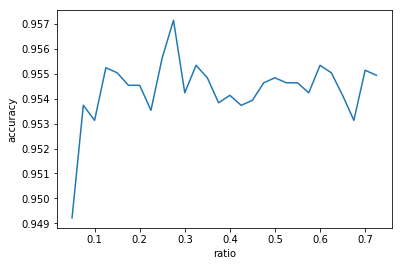

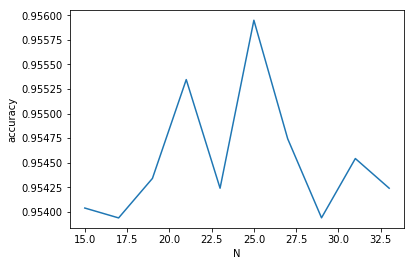

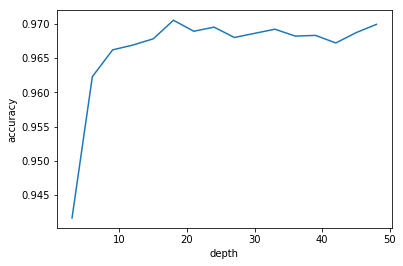

The accuracy for the classifier with optimal values is:  0.973516429622364


In [355]:
from sklearn.model_selection import KFold

kf = KFold(10)
kf.get_n_splits(data.X_train)

range_ratio = np.arange(0.05, 0.75, 0.025)
accuracies_ratio = []
for r in range_ratio:
    cv_accuracies = []
    for indices_train, indices_test in kf.split(data.X_train):
        classifier = BaggingClassifier(ratio = r)
        classifier.fit(data.X_train[indices_train], data.y_train[indices_train])
        outputs = classifier.predict(data.X_train[indices_test])
        matches = 0
        test_y = data.y_train[indices_test]
        for i in range(len(outputs)):
            if outputs[i] == test_y[i]:
                matches= matches + 1
        cv_accuracies.append(matches/len(outputs))
    accuracies_ratio.append(sum(cv_accuracies)/len(cv_accuracies))
    print("Computed the accuracy for ratio : ", r)
print('The optimal value of Ratio for the classifier is : ', range_ratio[np.argmax(accuracies_ratio)])
    
accuracies_N = []
N_range = np.arange(15,35,2)
for n in N_range:
    cv_accuracies = []
    for indices_train, indices_test in kf.split(data.X_train):
        classifier = BaggingClassifier(N = n)
        classifier.fit(data.X_train[indices_train], data.y_train[indices_train])
        outputs = classifier.predict(data.X_train[indices_test])
        matches = 0
        test_y = data.y_train[indices_test]
        for i in range(len(outputs)):
            if outputs[i] == test_y[i]:
                matches= matches + 1
        cv_accuracies.append(matches/len(outputs))
    accuracies_N.append(sum(cv_accuracies)/len(cv_accuracies))
    print("Computed the accuracy for N : ", n)
print('The optimal value of N for the classifier is : ', N_range[np.argmax(accuracies_N)])
    
accuracies_depth = []
depth_range = range(3,50, 3)
for d in depth_range:
    cv_accuracies = []
    for indices_train, indices_test in kf.split(data.X_train):
        classifier = BaggingClassifier(base = DecisionTreeClassifier(max_depth = d))
        classifier.fit(data.X_train[indices_train], data.y_train[indices_train])
        outputs = classifier.predict(data.X_train[indices_test])
        matches = 0
        test_y = data.y_train[indices_test]
        for i in range(len(outputs)):
            if outputs[i] == test_y[i]:
                matches= matches + 1
        cv_accuracies.append(matches/len(outputs))
    accuracies_depth.append(sum(cv_accuracies)/len(cv_accuracies))
    print("Computed the accuracy for depth : ", d)
print('The optimal value of depth for the classifier is : ', depth_range[np.argmax(accuracies_depth)])

plt.plot(list(range_ratio), accuracies_ratio)
plt.xlabel('ratio')
plt.ylabel('accuracy')
plt.show()
plt.plot(list(N_range), accuracies_N)
plt.xlabel('N')
plt.ylabel('accuracy')
plt.show()    
plt.plot(list(depth_range), accuracies_depth)
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.show()

classifier = BaggingClassifier(base = DecisionTreeClassifier(max_depth = depth_range[np.argmax(accuracies_depth)]), 
                               N = N_range[np.argmax(accuracies_N)],
                               ratio = range_ratio[np.argmax(accuracies_ratio)])
classifier.fit(data.X_train, data.y_train)
outputs = classifier.predict(data.X_valid)
matches = 0
for i in range(len(outputs)):
    if outputs[i] == data.y_valid[i]:
        matches= matches + 1
print("The accuracy for the classifier with optimal values is: ", matches/len(outputs))

# Random Decision Tree [10-points]

In this assignment you are going to implement a random decision tree using random vector method as discussed in the lecture.

Best split: One that achieves maximum reduction in gini index across multiple candidate splits. (decided by `candidate_splits` attribute of the class `RandomDecisionTree`)

Use `TreeNode` class as node abstraction to build the tree

You are allowed to add new attributes in the `TreeNode` and `RandomDecisionTree` class - if that helps.

Your tasks are as follows:
* Implement `gini_index` method which takes in class labels as parameter and returns the gini impurity as measure of uncertainty

* Implement `majority` method which picks the most frequent class label. In case of tie return any random class label

* Implement `find_best_split` method which finds the random vector/hyperplane which causes most reduction in the gini index. 

* Implement `build_tree` method which uses `find_best_split` method to get the best random split vector for current set of training points. This vector partitions the training points into two sets, and you should call `build_tree` method on two partitioned sets and build left subtree and right subtree. Use `TreeNode` as abstraction for a node.

> The method calls itself recursively to the generate left and right subtree till the point either `max_depth` is reached or no good random split is found.  When either of two cases is encountered, you should make that node as leaf and identify the label for that leaf to be the most frequent class (use `majority` method). Go through lecture slides for better understanding

* Implement `predict` method which takes in multiple data points and returns final prediction for each one of those using the tree built. (`root` attribute of the class)

In [5]:
import math 

class TreeNode:
    def __init__(self):
        self.left = None
        self.right = None
        self.isLeaf = False
        self.label = None
        self.split_vector = None

    def getLabel(self):
        if not self.isLeaf:
            raise Exception("Should not to do getLabel on a non-leaf node")
        return self.label
    
class RandomDecisionTree:
            
    def __init__(self, candidate_splits = 100, depth = 10):
        """
        Args:
            candidate_splits (int) : number of random decision splits to test
            depth (int) : maximum depth of the random decision tree
        """
        self.candidate_splits = candidate_splits
        self.depth = depth
        self.root = None
    
    def fit(self, X_train, y_train):
        """
        Args:
            X_train (ndarray): [n_samples x n_features] ndarray of training data   
            y_train (ndarray): [n_samples] ndarray of data
            
        """
        self.root = self.build_tree(X_train[:], y_train[:], 0)
        return self
        
    def build_tree(self, X_train, y_train, height):
        """
        Args:
            X_train (ndarray): [n_samples x n_features] ndarray of training data   
            y_train (ndarray): [n_samples] ndarray of data
            
        """
        node = TreeNode()
        # your logic here
        if height == self.depth or self.gini_index(y_train) == 0:
            node.isLeaf = True
            node.label = self.majority(y_train)
            node.left = node.right = None
        else:
            splitting_vector = self.find_best_split(X_train, y_train)
            split_masks = np.transpose(np.matmul(X_train, np.transpose(splitting_vector)))
            split_masks = np.array(split_masks) > 0
            if len(y_train[~split_masks]) == 0 or len(y_train[split_masks]) == 0:
                node.isLeaf = True
                node.label = self.majority(y_train)
                node.left = node.right = None
            else:
                node.split_vector = splitting_vector
                node.left = self.build_tree(X_train[~split_masks], y_train[~split_masks], height+1)
                node.right = self.build_tree(X_train[split_masks], y_train[split_masks], height+1)            
        return node
    
    def find_best_split(self, X_train, y_train):
        """
        Args:
            X_train (ndarray): [n_samples x n_features] ndarray of training data   
            y_train (ndarray): [n_samples] ndarray of data
            np.array([np.random.normal(mu, sigma, len(data.X_train[0])) for i in range(0, self.candidate_splits)])
        """
        mu, sigma = 0, 1.0 # mean and standard deviation
        candidate_split_vectors = np.array([np.random.normal(mu, sigma, len(data.X_train[0])) for i in range(0, self.candidate_splits)])
        solution = np.matmul(X_train, np.transpose(candidate_split_vectors))
        solution_mask = np.transpose(solution) > 0
        ginis = np.array([2*self.gini_index(y_train)-self.gini_index(y_train[~solution_mask[i]])*len(y_train[~solution_mask[i]])/len(y_train)-self.gini_index(y_train[solution_mask[i]])*len(y_train[solution_mask[i]])/len(y_train) for i in range(0, self.candidate_splits)])
        return candidate_split_vectors[np.argmax(ginis)]
            
        
    def gini_index(self, y):
        """
        Args:
            y (ndarray): [n_samples] ndarray of data
        """
        classes, count = np.unique(y, return_counts = True)
        count = count/len(y)
        classes_count_dict = dict(zip(classes, count))
        if 1 not in classes:
            classes_count_dict[1] = 0.0
        if -1 not in classes:
            classes_count_dict[-1] = 0.0
        return classes_count_dict[-1]*classes_count_dict[1]

    
    def majority(self, y):
        """
        Return the major class in ndarray y
        """
        (values, counts) = np.unique(y,return_counts=True)
        ind = np.argmax(counts)
        return values[ind]
        
    
    def predict(self, X):
        """
        BaggingClassifier prediction for new data points in X
        
        Args:
            X (ndarray): [n_samples x n_features] ndarray of data 
            
        Returns:
            yhat (ndarray): [n_samples] ndarray of predicted labels {-1,1}
        """
        y_hat = []
        for xx in X:
            node = self.root
            while node.isLeaf is False:
                dot_product = np.dot(node.split_vector, xx)
                if dot_product > 0:
                    node = node.right
                else:
                    node = node.left
            y_hat.append(node.getLabel())
        return y_hat
                

## RandomDecisionTree for Handwritten Digit Recognition

After you've successfully completed `RandomDecisionTree`, and train using the default values in the constructor and report accuracy on the test set. Use the data from `ThreesAndEights` class initialized variable `data` 

In [333]:
# Please wait for 10 to 12 seconds for the program to run
tree = RandomDecisionTree()
tree = tree.fit(data.X_train, data.y_train)
outputs = tree.predict(data.X_valid)
matches = 0
for i in range(len(outputs)):
    if outputs[i] == data.y_valid[i]:
        matches= matches + 1
print('The accuracy of the test set is : ', matches/len(outputs), ' or ', 100*matches/len(outputs),'%')

The accuracy of the test set is :  0.902893575282001  or  90.2893575282001 %


# Random Forest [5-points]
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

Random forest trains random decision trees on bootstrapped training points. Thus, you can implementation of methods (`bootstrap`, `predict`) from `BaggingClassifier` class directly. Only difference being, you have to use the `RandomDecisionTree` as base which you implemented previously instead of sklearn's implementation of `DecisionTreeClassifier`). Implement the `fit` method in the class below accordingly.

In [6]:
class RandomForest(BaggingClassifier):
    def __init__(self, ratio = 0.20, N = 20, max_depth = 10, candidate_splits = 100):
        self.ratio = ratio
        self.N = N
        self.learners = []
        self.candidate_splits = candidate_splits
        self.max_depth = max_depth
        
    def fit(self, X_train, y_train):
        """
        Train Bagging Ensemble Classifier on data
        
        Args:
            X_train (ndarray): [n_samples x n_features] ndarray of training data   
            y_train (ndarray): [n_samples] ndarray of data 
        """
        for i in range(self.N):
            b_X, b_y = self.boostrap(X_train, y_train)
            model_clone = RandomDecisionTree(candidate_splits = self.candidate_splits, depth = self.max_depth)
            model_clone.fit(b_X, b_y)
            self.learners.append(model_clone)
            

## RandomForest for Handwritten Digit Recognition [5-points]
***

After you've successfully completed `RandomForest` find the optimal values of `ratio`, `N`, `candidate_splits` and `depth` using k-fold cross validation on. Feel free to use sklearn library to split your training data. Use the data from `ThreesAndEights` class intialized variable `data`. 

Justify why those values are optimal.

Report best accuracy on the testing data using those optimal parameter values.

> The optimal values for the random forest classifier are achieved at `ratio = 0.4`, `N = 40`, `max_depth = 10` and `candidate splits = 400`. As we see in the graphs below we shall see that the maxima of the accuracy is at the above values after which the accuracy shows a decreasing trend due to increasing overfitting due to excessively effort for seperating the data well in training which introduces errors in training. The accuracy for these values is found to be approximately, $97\%$. The values above may vary slightly due to randomization in the algorithm of selecting data and splitting vector or hyperplane. 

Computed the accuracy for ratio :  0.1
Computed the accuracy for ratio :  0.2
Computed the accuracy for ratio :  0.30000000000000004
Computed the accuracy for ratio :  0.4
The optimal value of the ratio is: 0.4
Computed the accuracy for N :  10
Computed the accuracy for N :  20
Computed the accuracy for N :  30
Computed the accuracy for N :  40
Computed the accuracy for N :  50
The optimal value of the N is :  50
Computed the accuracy for the d :  2
Computed the accuracy for the d :  4
Computed the accuracy for the d :  6
Computed the accuracy for the d :  8
Computed the accuracy for the d :  10
The optimal value of the Depth is :  10
Computed the accuracy for the Candidate splits :  100
Computed the accuracy for the Candidate splits :  200
Computed the accuracy for the Candidate splits :  300
Computed the accuracy for the Candidate splits :  400
The optimal value of the candidate splits is :  400


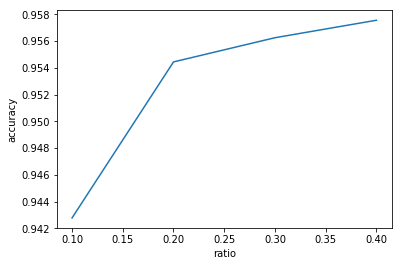

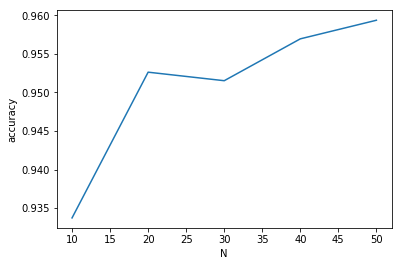

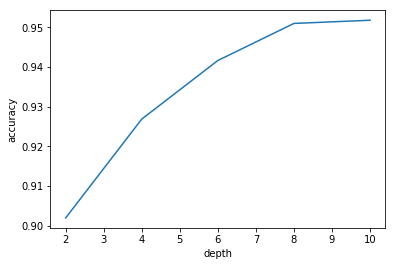

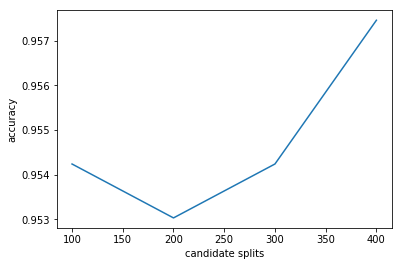

trained!
The accuracy of the test set is :  0.969592937714566  or  96.9592937714566 %


In [7]:
#The code may take apprroximately an hour to compute . Please be patient.

from sklearn.model_selection import KFold

kf = KFold(3)
kf.get_n_splits(data.X_train)

range_ratio = np.arange(0.1, 0.5, 0.1)
accuracies_ratio = []
for r in range_ratio:
    cv_accuracies = []
    for indices_train, indices_test in kf.split(data.X_train):
        classifier = RandomForest(ratio = r)
        classifier.fit(data.X_train[indices_train], data.y_train[indices_train])
        outputs = classifier.predict(data.X_train[indices_test])
        matches = 0
        test_y = data.y_train[indices_test]
        for i in range(len(outputs)):
            if outputs[i] == test_y[i]:
                matches= matches + 1
        cv_accuracies.append(matches/len(outputs))
    accuracies_ratio.append(sum(cv_accuracies)/len(cv_accuracies))
    print('Computed the accuracy for ratio : ', r)
print("The optimal value of the ratio is:", range_ratio[np.argmax(accuracies_ratio)])
    
accuracies_N = []
N_range = np.arange(10,60,10)
for n in N_range:
    cv_accuracies = []
    for indices_train, indices_test in kf.split(data.X_train):
        classifier = RandomForest(N = n)
        classifier.fit(data.X_train[indices_train], data.y_train[indices_train])
        outputs = classifier.predict(data.X_train[indices_test])
        matches = 0
        test_y = data.y_train[indices_test]
        for i in range(len(outputs)):
            if outputs[i] == test_y[i]:
                matches= matches + 1
        cv_accuracies.append(matches/len(outputs))
    accuracies_N.append(sum(cv_accuracies)/len(cv_accuracies))
    print("Computed the accuracy for N : ", n)
print("The optimal value of the N is : ", N_range[np.argmax(accuracies_N)])
    
accuracies_depth = []
depth_range = range(2,11,2)
for d in depth_range:
    cv_accuracies = []
    for indices_train, indices_test in kf.split(data.X_train):
        classifier = RandomForest(max_depth = d)
        classifier.fit(data.X_train[indices_train], data.y_train[indices_train])
        outputs = classifier.predict(data.X_train[indices_test])
        matches = 0
        test_y = data.y_train[indices_test]
        for i in range(len(outputs)):
            if outputs[i] == test_y[i]:
                matches= matches + 1
        cv_accuracies.append(matches/len(outputs))
    accuracies_depth.append(sum(cv_accuracies)/len(cv_accuracies))
    print("Computed the accuracy for the d : ",d)
print("The optimal value of the Depth is : ", depth_range[np.argmax(accuracies_depth)])

accuracies_splits = []
split_range = range(100,500, 100)
for s in split_range:
    cv_accuracies = []
    for indices_train, indices_test in kf.split(data.X_train):
        classifier = RandomForest(candidate_splits = s)
        classifier.fit(data.X_train[indices_train], data.y_train[indices_train])
        outputs = classifier.predict(data.X_train[indices_test])
        matches = 0
        test_y = data.y_train[indices_test]
        for i in range(len(outputs)):
            if outputs[i] == test_y[i]:
                matches= matches + 1
        cv_accuracies.append(matches/len(outputs))
    accuracies_splits.append(sum(cv_accuracies)/len(cv_accuracies))
    print("Computed the accuracy for the Candidate splits : ", s)
print("The optimal value of the candidate splits is : ", split_range[np.argmax(accuracies_splits)])

plt.plot(list(range_ratio), accuracies_ratio)
plt.xlabel('ratio')
plt.ylabel('accuracy')
plt.show()
plt.plot(list(N_range), accuracies_N)
plt.xlabel('N')
plt.ylabel('accuracy')
plt.show()    
plt.plot(list(depth_range), accuracies_depth)
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.show()
plt.plot(list(split_range), accuracies_splits)
plt.xlabel('candidate splits')
plt.ylabel('accuracy')
plt.show()

forest = RandomForest(candidate_splits = 400,
                     N = 40,
                     max_depth = 10,
                     ratio = 0.4) 

forest.fit(data.X_train, data.y_train)
print('trained!')
outputs = forest.predict(data.X_valid)
matches = 0
for i in range(len(outputs)):
    if outputs[i] == data.y_valid[i]:
        matches= matches + 1
print('The accuracy of the test set is : ', matches/len(outputs), ' or ', 100*matches/len(outputs),'%')